In [2]:
# Import Packages
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [ ]:
# Define Anticident {Linguistic Variable}
LightX1 = ctrl.Antecedent(np.arange(120, 220), label="LightX1") 
LightX2 = ctrl.Antecedent(np.arange(-10, 11), label="LightX2")
# Define Conclusion
Dimmer = ctrl.Consequent(np.arange(0, 11), label="Dimmer")

In [ ]:
# Define Linguistic Values For Linguistic Varaible [Fuzzification]
LightX1["Dark"] = fuzz.trapmf(LightX1.universe, [120, 120, 130, 150])
LightX1["Medium"] = fuzz.trapmf(LightX1.universe, [130, 150, 190, 210])
LightX1["Light"] = fuzz.trapmf(LightX1.universe, [190, 210, 220, 220])
LightX1.view()

LightX2["Negative-Small"] = fuzz.trimf(LightX2.universe, [-20, -10, 0])
LightX2["Zero"] = fuzz.trimf(LightX2.universe, [-10, 0, 10])
LightX2["Positive-Small"] = fuzz.trimf(LightX2.universe, [0, 10, 20])
LightX2.view()

Dimmer["Very-Small"] = fuzz.trapmf(Dimmer.universe, [0, 0, 2, 4])
Dimmer["Small"] = fuzz.trimf(Dimmer.universe, [2, 4, 6])
Dimmer["Big"] = fuzz.trimf(Dimmer.universe, [4, 6, 8])
Dimmer["Very-Big"] = fuzz.trapmf(Dimmer.universe, [6, 8, 10, 10])
Dimmer.view()

In [67]:
# Define Rule [Inference]
rule1 = ctrl.Rule(LightX1["Dark"] & LightX2["Zero"], Dimmer["Big"])
rule2 = ctrl.Rule(LightX1["Dark"] & LightX2["Negative-Small"], Dimmer["Very-Big"])

In [68]:
# Agregation
agregated_rules = ctrl.ControlSystem([rule1, rule2])

In [70]:
# Deffuzification
dimmer_res = ctrl.ControlSystemSimulation(agregated_rules)

IF LightX1 is 125 and LightX2 is -6 Then Dimmer is {'Dimmer': 7.458333333333333}


/home/abdellah/.local/lib/python3.12/site-packages/skfuzzy/control/fuzzyvariable.py:125: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


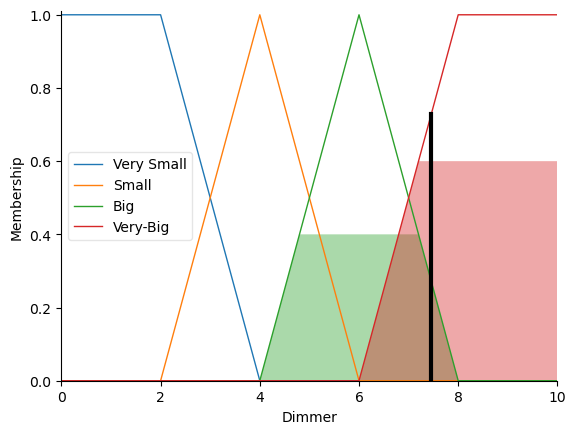

In [75]:
# Test With Result
light_x1 = 125
light_x2 = -6

dimmer_res.input["LightX1"] = light_x1
dimmer_res.input["LightX2"] = light_x2
dimmer_res.compute() # calculate output

print(f"IF LightX1 is {light_x1} and LightX2 is {light_x2} Then Dimmer is {dimmer_res.output}")
Dimmer.view(sim=dimmer_res)
